In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

# import data

loanData=pd.read_csv('./loans.csv')

# display first 5 records

loanData.head(5)

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


In [165]:
# check data types
loanData.dtypes

Customer ID           int64
Fictional Surname    object
Age                   int64
Gender               object
Years at address      int64
Employment status    object
Country              object
Current debt          int64
Postcode             object
Income                int64
Own home             object
CCJs                  int64
Loan amount           int64
Outcome              object
dtype: object

In [166]:
# check shape
loanData.shape

(2000, 14)

In [167]:
###################################

#       DATA PREPARATION

###################################

In [168]:
#  remove unused columns
loanData=loanData.drop(columns=['Customer ID','Fictional Surname','Country','Postcode'])
loanData.head(5)

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid


In [169]:
# check for null values
loanData.isnull().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [170]:
# check for NAN values
loanData.isna().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [171]:
# check for duplicates and drop them
loanData.duplicated()
loanData.drop_duplicates()

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid
...,...,...,...,...,...,...,...,...,...,...
1995,60,F,4,Self Employed,2900,22500,Own,1,15725,Paid
1996,24,F,7,Self Employed,5130,38000,Own,0,35911,Paid
1997,34,M,5,Unemployed,6530,41500,Own,2,6874,Paid
1998,52,F,2,Employed,930,32500,Own,0,5412,Paid


In [172]:
################################################################################################

#     PLOT VARIABLES AND CHECK FOR MISTAKES
#     REMOVE OUTLIERS OR CHANGE THEM

################################################################################################

In [173]:
#########################################################

#     GENDER COLUMN GRAPHING AND EXPLORATORY ANALYSIS

#########################################################

<AxesSubplot:title={'center':'Gender counts'}>

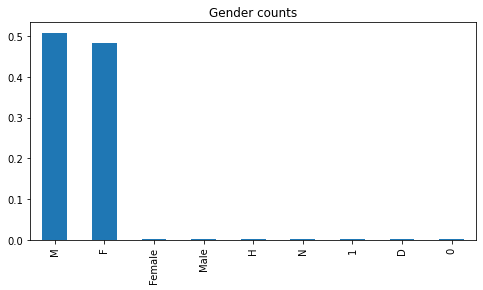

In [174]:

loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


<AxesSubplot:title={'center':'Gender counts'}>

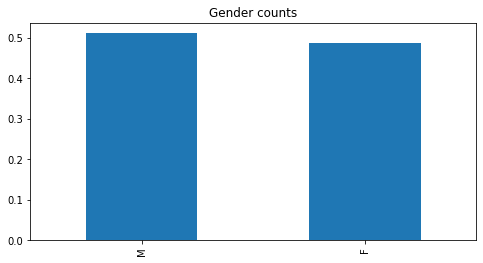

In [175]:

###########     clean gender data    ###############

loanData['Gender'].replace(['Female','Male','H','N','1','D','0'],['F','M','F','M','M','F','F'], inplace=True)
loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


In [176]:
#########################################################
#########################################################
#########################################################



In [177]:
#################################################################

#     EMPLOYMENT STATUS COLUMN GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

<AxesSubplot:title={'center':'Employment status counts'}>

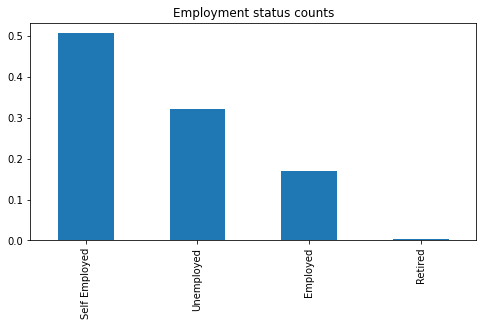

In [178]:

###########     Employment status graphs    ###############
emp=loanData[(loanData['Employment status']=='Retired')]
#print(emp)

loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

<AxesSubplot:title={'center':'Employment status counts'}>

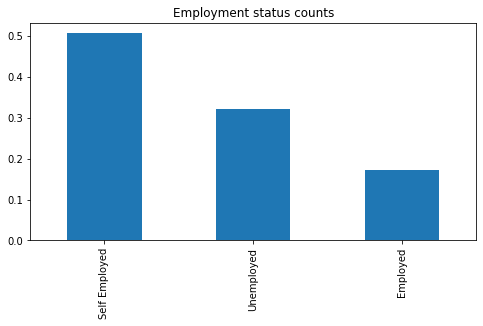

In [179]:

###########     clean employment status data    ###############

loanData['Employment status'].replace(['Retired'],['Employed'], inplace=True)
loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

In [180]:
#################################################################
#################################################################
#################################################################




In [181]:
#################################################################

#     OWN HOMES COLUMN GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

<AxesSubplot:title={'center':'Own home counts'}>

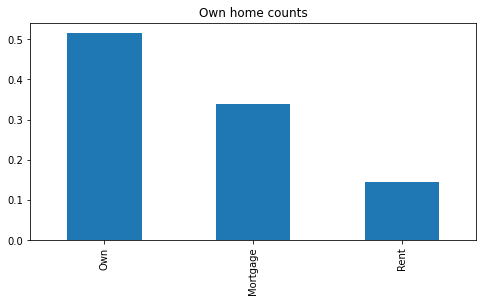

In [182]:

###########     Own homes graphs    ###############

loanData['Own home'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Own home counts')


In [183]:
#################################################################
#################################################################
#################################################################




In [184]:
#################################################################

#     OUTCOME COLUMN GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

<AxesSubplot:title={'center':'Outcome counts'}>

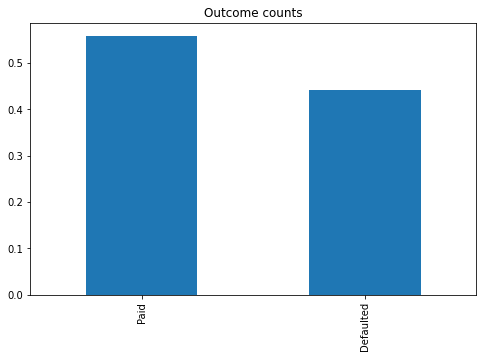

In [185]:

###########     Loan Outcome graphs    ###############

loanData['Outcome'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Outcome counts')


In [186]:
#################################################################
#################################################################
#################################################################



In [187]:
#################################################################

#     AGE GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

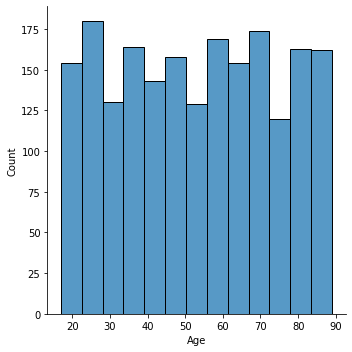

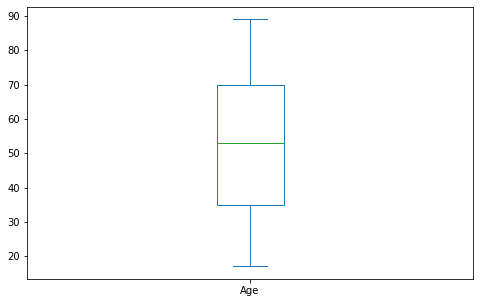

In [188]:
sns.displot(loanData['Age'])
plt.show()
loanData['Age'].plot.box(figsize=(8,5))
plt.show()

In [189]:
#################################################################
#################################################################
#################################################################



In [190]:
#################################################################

#     YEARS AT ADDRESS GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

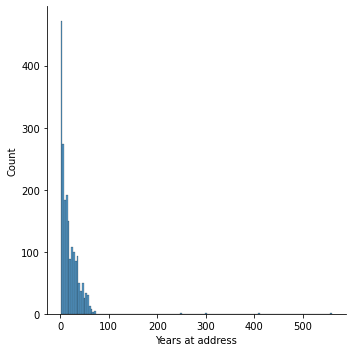

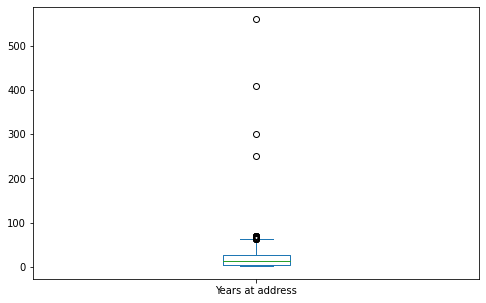

In [191]:
#   plot initial graphs

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

In [194]:
#####  THIS SECTION WAS RUN TWICE !!!!  #####

# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['Years at address']),[75,25])
# print(q3,q1)
intrQuartRange=q3-q1
# print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['Years at address']>upperBound,'Years at address']=np.nan
loanData.loc[loanData['Years at address']<lowerBound,'Years at address']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mean
mean = math.floor(loanData['Years at address'].mean())

# replace null values with mean

loanData['Years at address'].fillna(mean,inplace=True)
# print(loanData.isnull().sum())




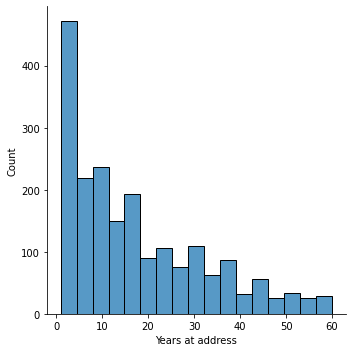

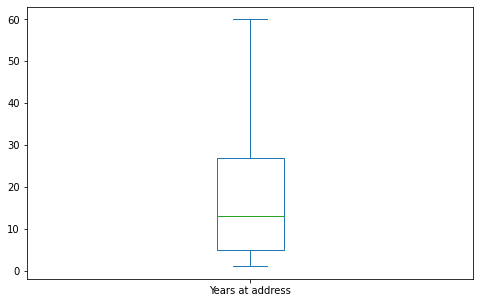

In [195]:
#   plot graphs with outliers removed

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

In [ ]:
#################################################################
#################################################################
#################################################################



In [ ]:
#################################################################

#     CURRENT DEBT GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

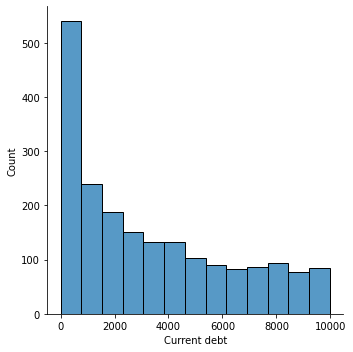

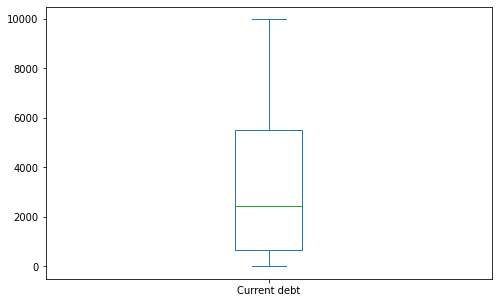

In [196]:
sns.displot(loanData['Current debt'])
plt.show()
loanData['Current debt'].plot.box(figsize=(8,5))
plt.show()

In [ ]:
#################################################################
#################################################################
#################################################################

In [ ]:
#################################################################

#     INCOME GRAPHING AND EXPLORATORY ANALYSIS

#################################################################

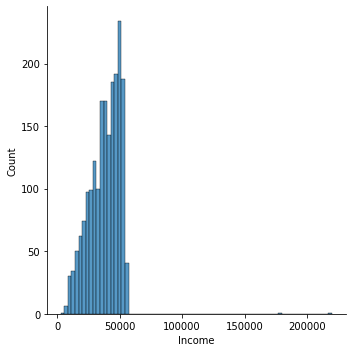

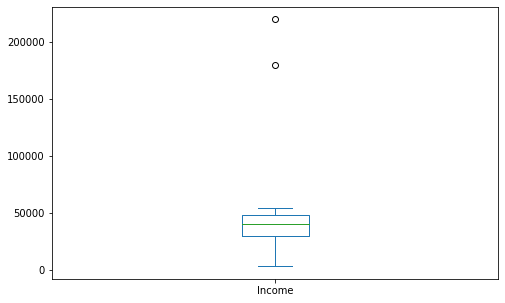

In [197]:

sns.displot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(8,5))
plt.show()

In [ ]:
#################################################################
#################################################################
#################################################################

In [52]:
# preprocess data. Convert strings to usable values

le = preprocessing.LabelEncoder()
loanData=loanData.apply(le.fit_transform)

In [86]:
# remove unnecessary columns

X=loanData.drop(columns=['Outcome','Fictional Surname','Country'])
y=loanData['Outcome']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)


In [54]:
# setup model

model=DecisionTreeClassifier()

In [55]:
# train model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
# predict using model

predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(score)
print(predictions[:10])
print(y_test[:10])

0.9242857142857143
[1 1 0 1 1 0 0 0 1 0]
91      1
0       1
48      1
979     1
20      1
1488    0
1079    0
1178    1
1261    1
528     0
Name: Outcome, dtype: int64
